In [ ]:
import requests
import csv
from zipfile import ZipFile
import re

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

# Objetivo
Exploração dos microdados do ENEM 2019, analisando as características socioeconômicas dos candidatos e observando a relação entre as mesmas e as notas médias.

# Obtenção dos Dados

In [ ]:
url_enem = 'https://download.inep.gov.br/microdados/microdados_enem_2019.zip'

In [ ]:
req = requests.get(url_enem,stream = True)

In [ ]:
req_enem = requests.get(url_enem,stream = True)
with open('enem_2019.zip','wb') as fd:
  for chunk in req_enem.iter_content(chunk_size=10000):
    fd.write(chunk)

In [ ]:
ZipFile('/content/enem_2019.zip','r').extractall()

## Análise e Visualização:

In [ ]:
sns.set()

In [ ]:
colunas = ['NU_INSCRICAO', 'NU_ANO', 'SG_UF_RESIDENCIA', 'NU_IDADE', 
           'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_NACIONALIDADE', 
           'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
           'IN_TREINEIRO', 'SG_UF_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 
           'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
           'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
           'NU_NOTA_REDACAO', 
           'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 
           'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 
           'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 
           'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dados/MICRODADOS_ENEM_2019.csv',sep=';', usecols = colunas ,encoding = 'ISO-8859-1')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 50 columns):
 #   Column             Dtype  
---  ------             -----  
 0   NU_INSCRICAO       int64  
 1   NU_ANO             int64  
 2   SG_UF_RESIDENCIA   object 
 3   NU_IDADE           int64  
 4   TP_SEXO            object 
 5   TP_ESTADO_CIVIL    int64  
 6   TP_COR_RACA        int64  
 7   TP_NACIONALIDADE   int64  
 8   TP_ST_CONCLUSAO    int64  
 9   TP_ANO_CONCLUIU    int64  
 10  TP_ESCOLA          int64  
 11  TP_ENSINO          float64
 12  IN_TREINEIRO       int64  
 13  SG_UF_ESC          object 
 14  TP_PRESENCA_CN     int64  
 15  TP_PRESENCA_CH     int64  
 16  TP_PRESENCA_LC     int64  
 17  TP_PRESENCA_MT     int64  
 18  NU_NOTA_CN         float64
 19  NU_NOTA_CH         float64
 20  NU_NOTA_LC         float64
 21  NU_NOTA_MT         float64
 22  TP_LINGUA          int64  
 23  TP_STATUS_REDACAO  float64
 24  NU_NOTA_REDACAO    float64
 25  Q001              

In [ ]:
df.shape

(5095270, 50)

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,PA,21,M,1,3,4,1,3,1,NaN,0,NaN,1,1,1,1,472.9,466.0,497.3,369.1,0,1.0,780.0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,PA,16,F,1,3,1,3,0,1,NaN,1,NaN,1,1,1,1,358.9,495.4,482.3,416.5,1,1.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,PA,18,F,1,1,1,2,0,3,1.0,0,PA,1,1,1,1,574.2,538.7,582.6,571.5,0,1.0,640.0,H,E,A,D,3,C,D,E,E,C,A,B,C,B,A,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,PA,23,M,0,3,1,2,0,2,1.0,0,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,D,D,A,B,3,C,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,PA,23,M,1,3,1,1,5,1,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,B,C,A,A,5,C,A,C,B,A,B,B,A,B,A,A,A,A,B,A,A,D,A,A,A


### Escolaridade da mãe:

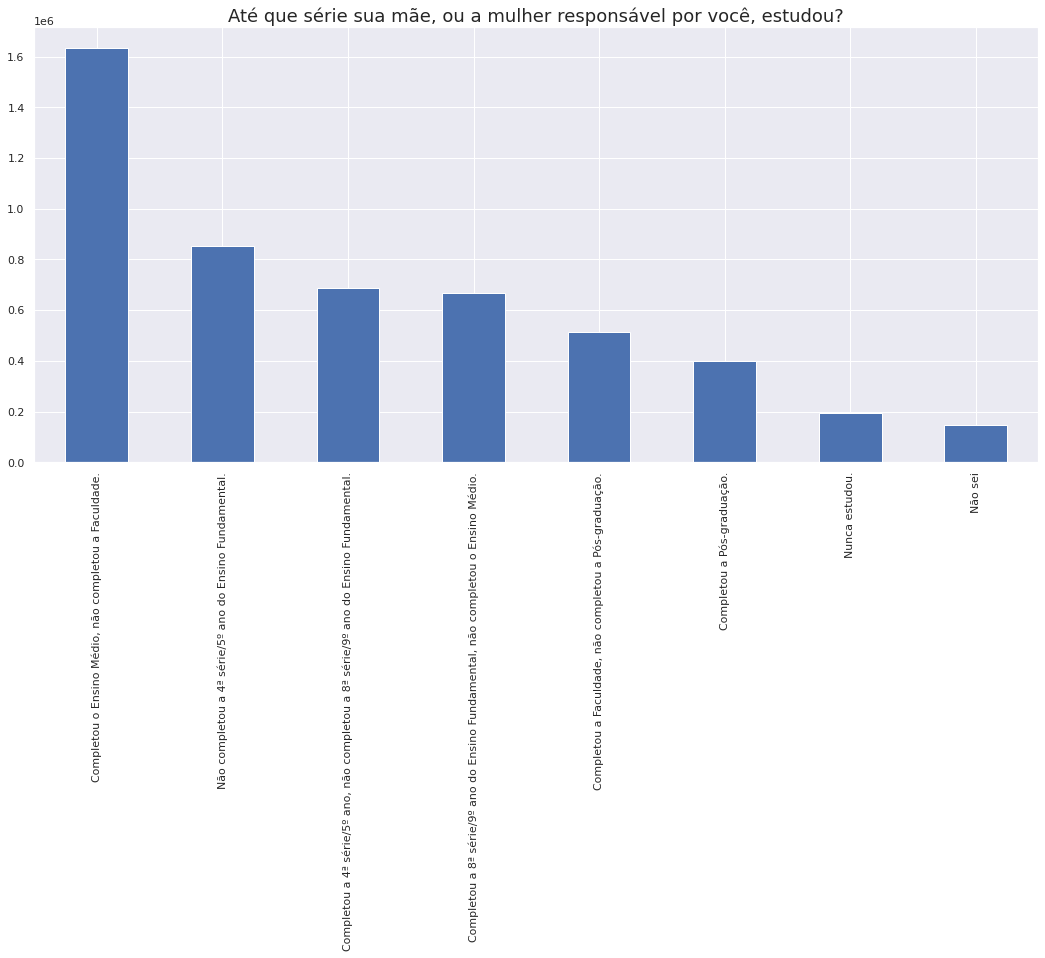

In [ ]:
df['Q002'].map({'A' : 'Nunca estudou.', 'B' : 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
                               'C' : 'Completou a 4ª série/5º ano, não completou a 8ª série/9º ano do Ensino Fundamental.',
                               'D' : 'Completou a 8ª série/9º ano do Ensino Fundamental, não completou o Ensino Médio.',
                               'E' : 'Completou o Ensino Médio, não completou a Faculdade.',
                               'F' : 'Completou a Faculdade, não completou a Pós-graduação.',
                               'G' : 'Completou a Pós-graduação.',
                               'H' : 'Não sei'}).value_counts().plot.bar(figsize = (18,8))
plt.title('Até que série sua mãe, ou a mulher responsável por você, estudou?',fontsize = 18)
plt.show()

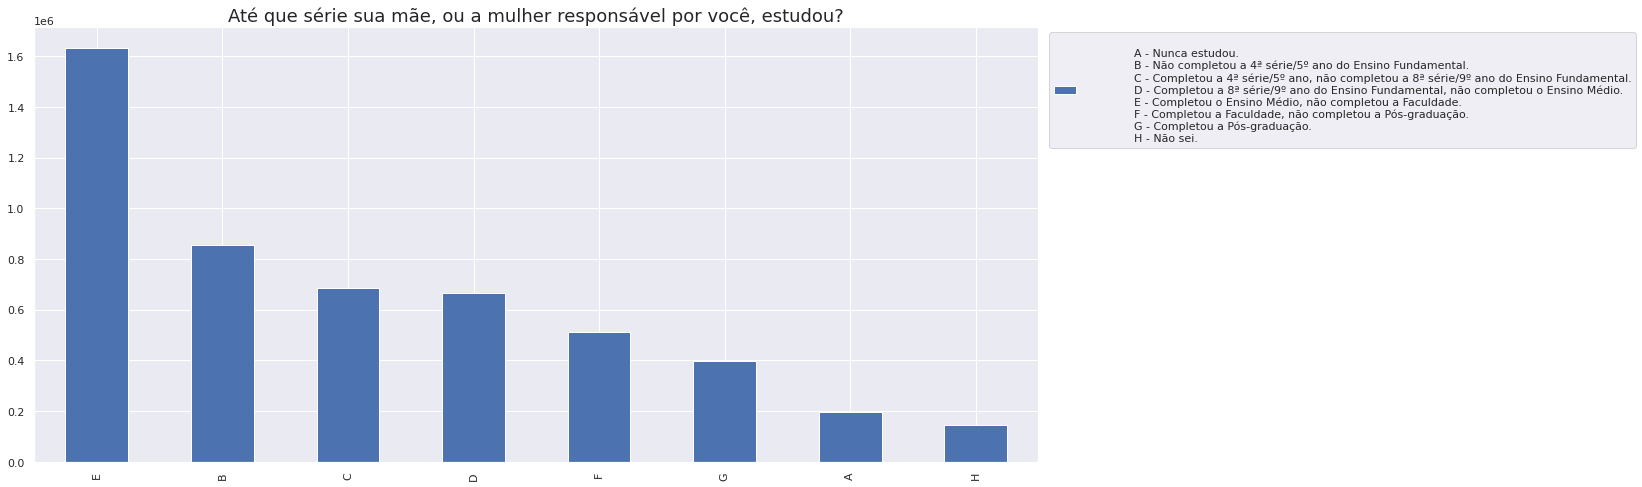

In [ ]:
df['Q002'].value_counts().plot.bar(figsize = (18,8))
plt.title('Até que série sua mãe, ou a mulher responsável por você, estudou?',fontsize = 18)
plt.legend(['''
              A - Nunca estudou.
              B - Não completou a 4ª série/5º ano do Ensino Fundamental.
              C - Completou a 4ª série/5º ano, não completou a 8ª série/9º ano do Ensino Fundamental.
              D - Completou a 8ª série/9º ano do Ensino Fundamental, não completou o Ensino Médio.
              E - Completou o Ensino Médio, não completou a Faculdade.
              F - Completou a Faculdade, não completou a Pós-graduação.
              G - Completou a Pós-graduação.
              H - Não sei.'''], bbox_to_anchor = (1.60,1))

plt.show()

### Renda da família:

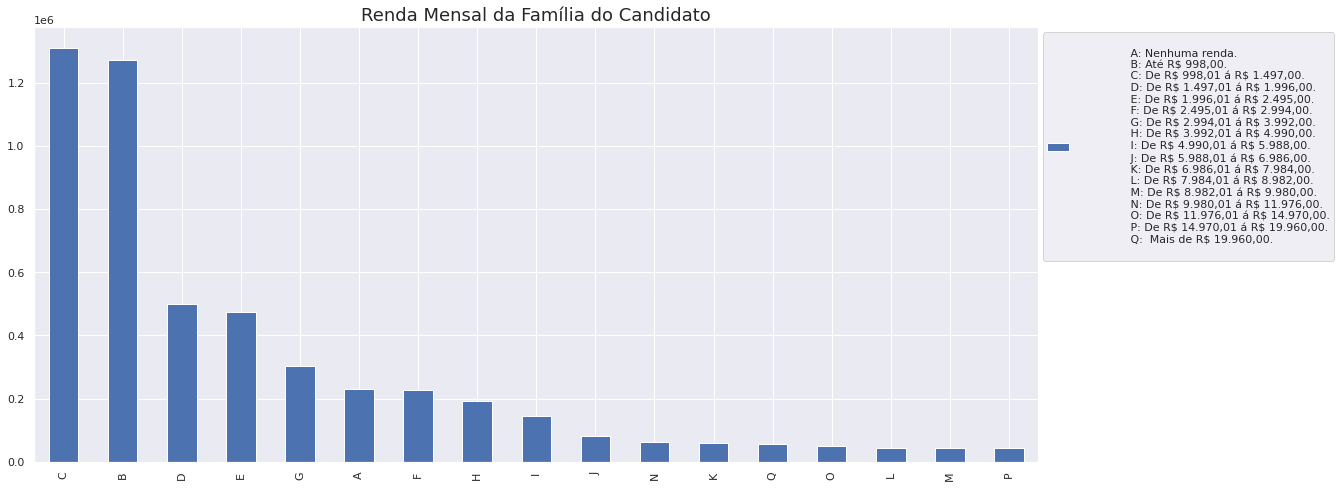

In [ ]:
df['Q006'].value_counts().plot.bar(figsize = (18,8))

plt.title('Renda Mensal da Família do Candidato', fontsize = 18)
plt.legend(['''
               A: Nenhuma renda.
               B: Até R\$ 998,00.
               C: De R\$ 998,01 á R\$ 1.497,00.
               D: De R\$ 1.497,01 á R\$ 1.996,00.
               E: De R\$ 1.996,01 á R\$ 2.495,00.
               F: De R\$ 2.495,01 á R\$ 2.994,00.
               G: De R\$ 2.994,01 á R\$ 3.992,00.
               H: De R\$ 3.992,01 á R\$ 4.990,00.
               I: De R\$ 4.990,01 á R\$ 5.988,00.
               J: De R\$ 5.988,01 á R\$ 6.986,00.
               K: De R\$ 6.986,01 á R\$ 7.984,00.
               L: De R\$ 7.984,01 á R\$ 8.982,00.
               M: De R\$ 8.982,01 á R\$ 9.980,00.
               N: De R\$ 9.980,01 á R\$ 11.976,00.
               O: De R\$ 11.976,01 á R\$ 14.970,00.
               P: De R\$ 14.970,01 á R\$ 19.960,00.
               Q:  Mais de R\$ 19.960,00.
               '''], bbox_to_anchor = (1.30,1))

plt.show()

### Acesso à celular:

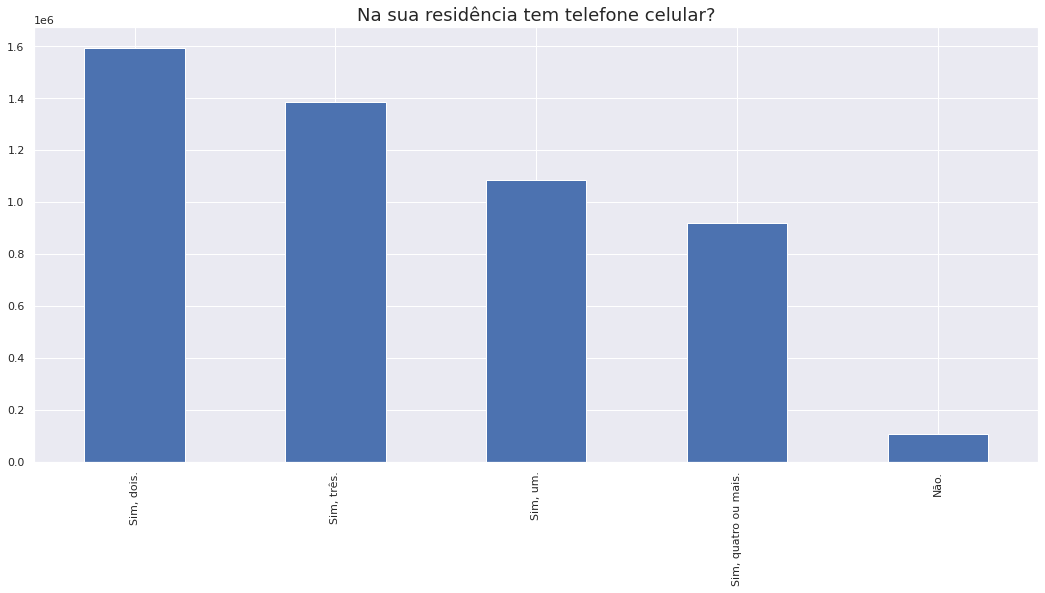

In [ ]:
df['Q022'].map({'A' : 'Não.','B' : 'Sim, um.','C' : 'Sim, dois.','D' : 'Sim, três.','E' : 'Sim, quatro ou mais.'}).value_counts().plot.bar(figsize = (18,8))
plt.title('Na sua residência tem telefone celular?', fontsize = 18)

plt.show()

### Acesso à computador:

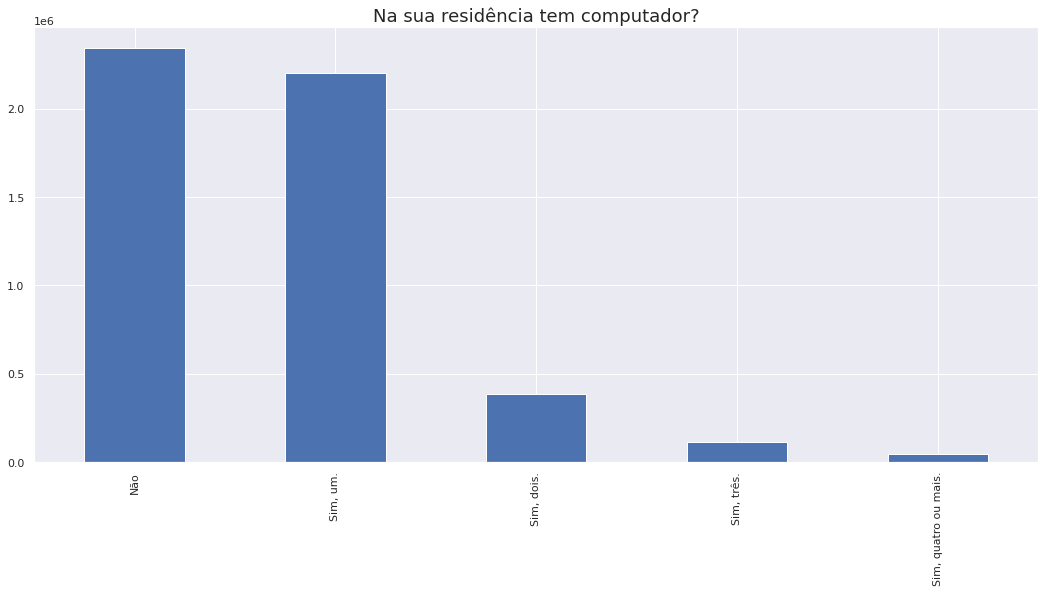

In [ ]:
df['Q024'].map({'A': 'Não','B':'Sim, um.','C' : 'Sim, dois.', 'D' : 'Sim, três.', 'E' : 'Sim, quatro ou mais.'}).value_counts().plot.bar(figsize = (18,8))
plt.title('Na sua residência tem computador?', fontsize = 18)


plt.show()

### Acesso à internet:

In [ ]:
### Como transformar números de variáveis categóricas em texto:
# 1º - map : df['Q025'].map({'A':'Não','B':'Sim'})
# 2º replace: df['Q025'].replace(['A','B'],['Não','Sim'])

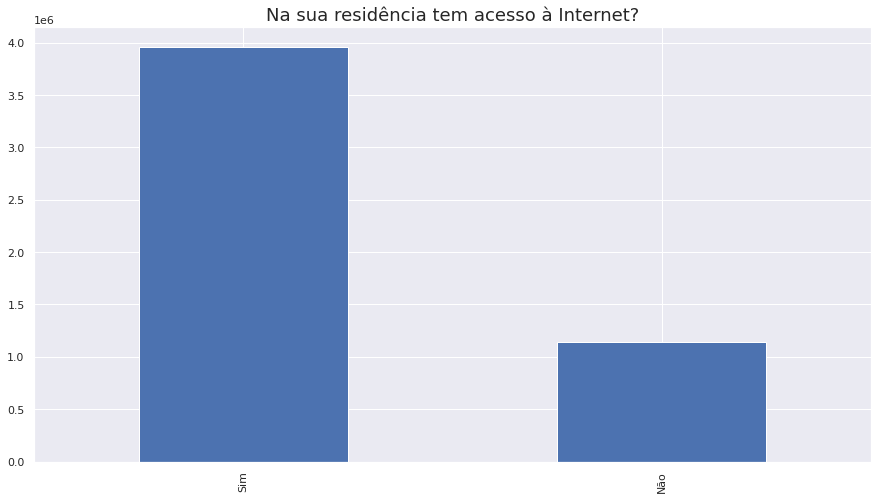

In [ ]:
df['Q025'].map({'A':'Não','B':'Sim'}).value_counts().plot.bar(figsize = (15,8))
plt.title('Na sua residência tem acesso à Internet?', fontsize = 18)

plt.show()

## Distribuição de Médias:

In [ ]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

In [ ]:
df['Média'] = df[notas].mean(axis=1)

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Média
0,190001004627,2019,PA,21,M,1,3,4,1,3,1,NaN,0,NaN,1,1,1,1,472.9,466.0,497.3,369.1,0,1.0,780.0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A,517.06
1,190001004628,2019,PA,16,F,1,3,1,3,0,1,NaN,1,NaN,1,1,1,1,358.9,495.4,482.3,416.5,1,1.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,470.62
2,190001004629,2019,PA,18,F,1,1,1,2,0,3,1.0,0,PA,1,1,1,1,574.2,538.7,582.6,571.5,0,1.0,640.0,H,E,A,D,3,C,D,E,E,C,A,B,C,B,A,B,A,A,D,B,B,D,A,C,B,581.40
3,190001004630,2019,PA,23,M,0,3,1,2,0,2,1.0,0,PA,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,D,D,A,B,3,C,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,D,A,A,A,NaN
4,190001004631,2019,PA,23,M,1,3,1,1,5,1,1.0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,1,NaN,NaN,B,C,A,A,5,C,A,C,B,A,B,B,A,B,A,A,A,A,B,A,A,D,A,A,A,NaN


### Escola do Ensino Médio:

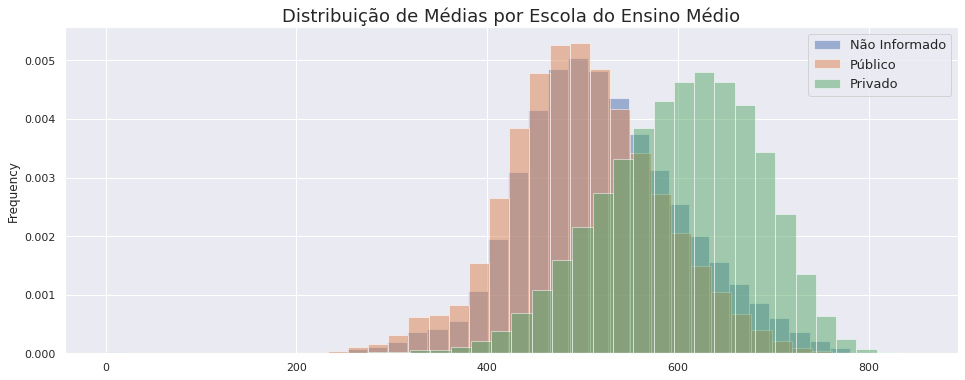

In [ ]:
df.groupby('TP_ESCOLA')['Média'].plot.hist(figsize = (16,6), bins = 40, alpha = 0.5, density = True)
plt.title('Distribuição de Médias por Escola do Ensino Médio',fontsize = 18)
plt.legend(['Não Informado','Público','Privado'],fontsize = 13)

plt.show()

### Etnia:

In [ ]:
df['SG_UF_RESIDENCIA'].unique()

array(['PA', 'TO', 'MA', 'MG', 'CE', 'AM', 'GO', 'RO', 'DF', 'SC', 'PR',
       'AP', 'PI', 'RJ', 'ES', 'RR', 'SP', 'RS', 'MT', 'AC', 'MS', 'BA',
       'PB', 'PE', 'RN', 'SE', 'AL'], dtype=object)

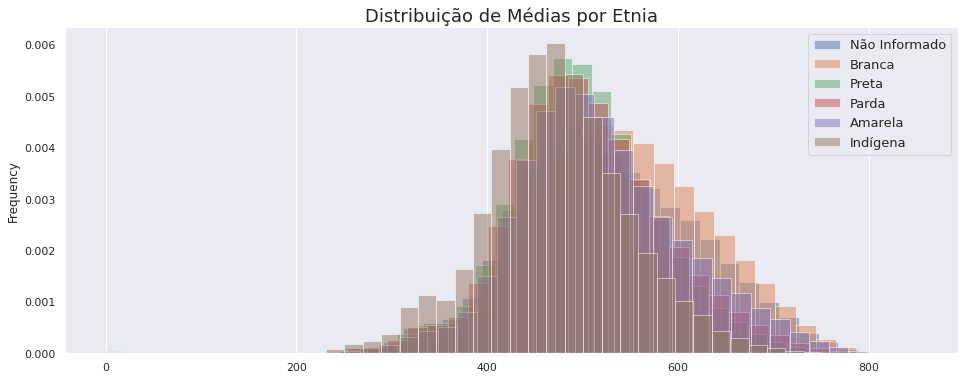

In [ ]:
df.groupby('TP_COR_RACA')['Média'].plot.hist(figsize = (16,6), bins = 40, alpha = 0.5, density = True)
plt.legend(['Não Informado','Branca', 'Preta', 'Parda', 'Amarela', 'Indígena' ],fontsize = 13)
plt.title('Distribuição de Médias por Etnia', fontsize = 18)
plt.grid(axis = 'y')

plt.show()

### Escolaridade da Mãe:

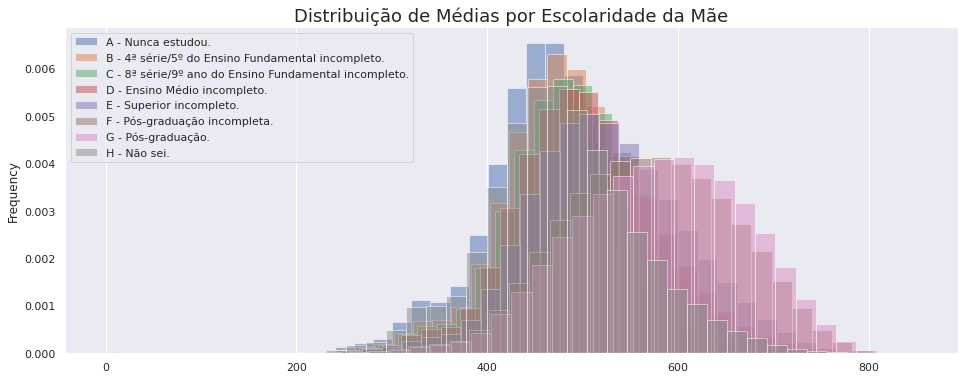

In [ ]:
df.groupby('Q002')['Média'].plot.hist(figsize = (16,6), bins = 40, alpha = 0.5, density = True)
plt.grid(axis = 'y')
plt.title('Distribuição de Médias por Escolaridade da Mãe', fontsize = 18)
plt.legend(['A - Nunca estudou.',
            'B - 4ª série/5º do Ensino Fundamental incompleto.',
            'C - 8ª série/9º ano do Ensino Fundamental incompleto.',
            'D - Ensino Médio incompleto.',
            'E - Superior incompleto.',
            'F - Pós-graduação incompleta.',
            'G - Pós-graduação.',
            'H - Não sei.'], loc = 'upper left')
plt.show()

### Renda da Família:

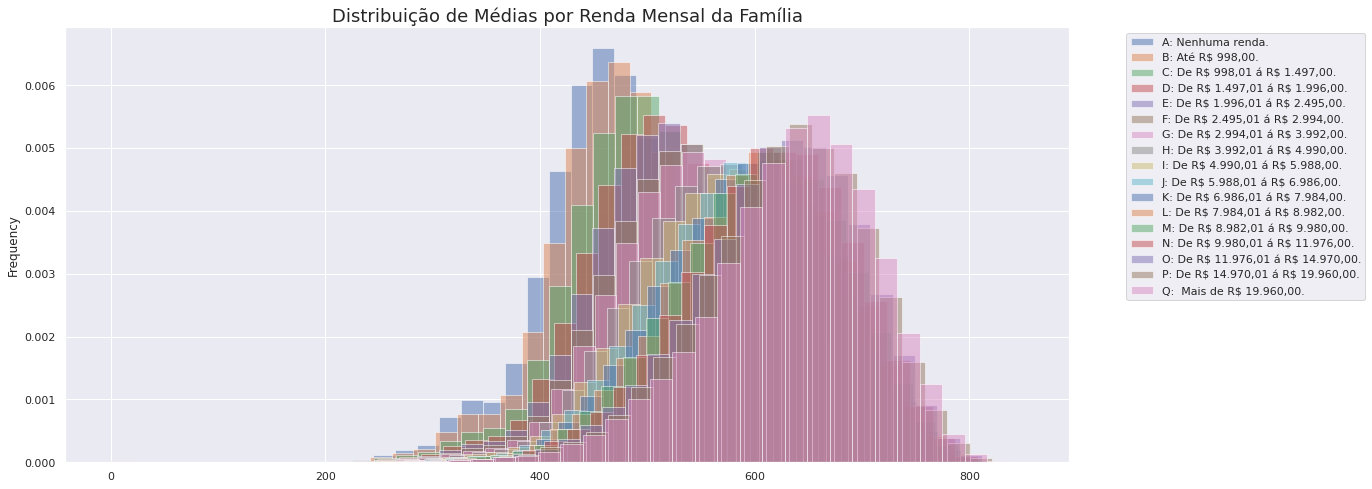

In [ ]:
df.groupby('Q006')['Média'].plot.hist(figsize = (18,8), bins = 40, alpha = 0.5, density = True)

plt.title('Distribuição de Médias por Renda Mensal da Família', fontsize = 18)
plt.legend(['A: Nenhuma renda.',
            'B: Até R\$ 998,00.',
            'C: De R\$ 998,01 á R\$ 1.497,00.',
            'D: De R\$ 1.497,01 á R\$ 1.996,00.',
            'E: De R\$ 1.996,01 á R\$ 2.495,00.',
            'F: De R\$ 2.495,01 á R\$ 2.994,00.',
            'G: De R\$ 2.994,01 á R\$ 3.992,00.',
            'H: De R\$ 3.992,01 á R\$ 4.990,00.',
            'I: De R\$ 4.990,01 á R\$ 5.988,00.',
            'J: De R\$ 5.988,01 á R\$ 6.986,00.',
            'K: De R\$ 6.986,01 á R\$ 7.984,00.',
            'L: De R\$ 7.984,01 á R\$ 8.982,00.',
            'M: De R\$ 8.982,01 á R\$ 9.980,00.',
            'N: De R\$ 9.980,01 á R\$ 11.976,00.',
            'O: De R\$ 11.976,01 á R\$ 14.970,00.',
            'P: De R\$ 14.970,01 á R\$ 19.960,00.',
            'Q:  Mais de R\$ 19.960,00.'], bbox_to_anchor = (1.30,1))

plt.show()

### Acesso à Internet:

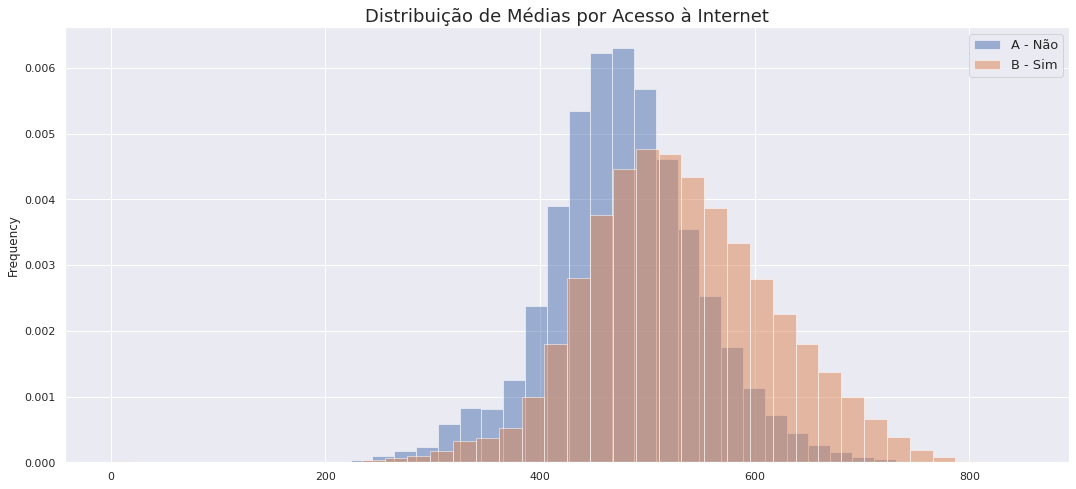

In [ ]:
df.groupby('Q025')['Média'].plot.hist(figsize = (18,8), bins = 40, alpha = 0.5, density = True)
plt.title('Distribuição de Médias por Acesso à Internet',fontsize = 18)
plt.legend(['A - Não','B - Sim'],fontsize = 13)

plt.show()

### Acesso a Computador:

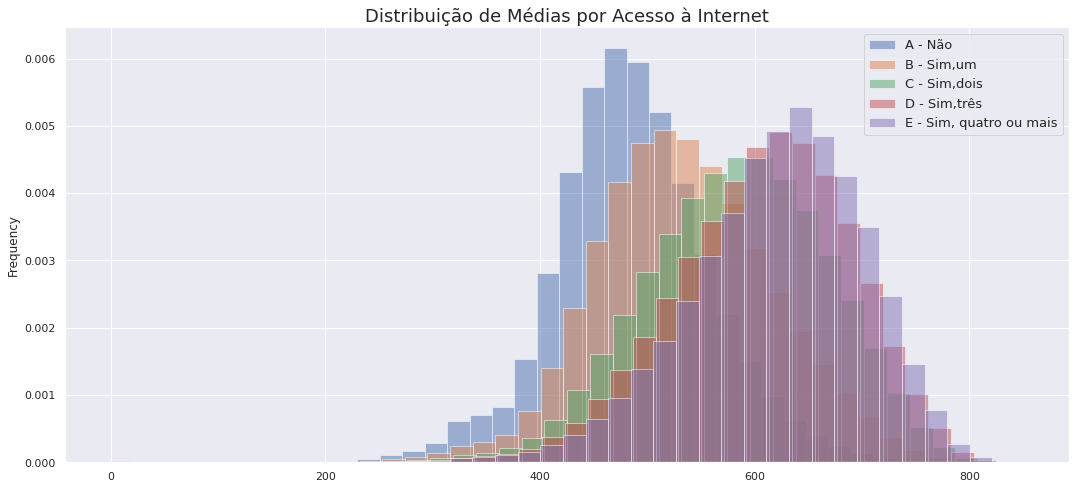

In [ ]:
df.groupby('Q024')['Média'].plot.hist(figsize = (18,8), bins = 40, alpha = 0.5, density = True)
plt.title('Distribuição de Médias por Acesso à Internet',fontsize = 18)
plt.legend(['A - Não','B - Sim,um','C - Sim,dois', 'D - Sim,três', 'E - Sim, quatro ou mais'],fontsize = 13)

plt.show()

### Acesso a Celular:

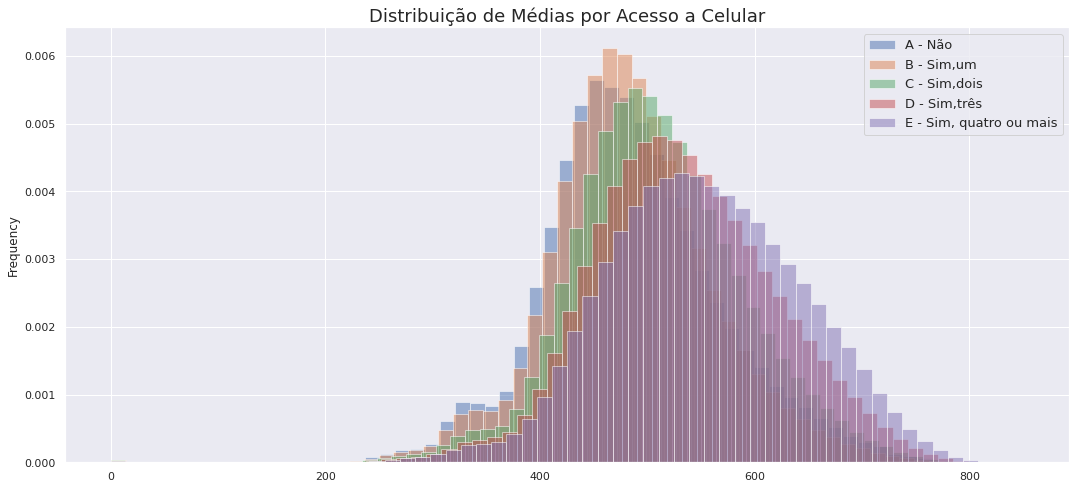

In [ ]:
df.groupby('Q022')['Média'].plot.hist(figsize = (18,8), bins = 60, alpha = 0.5, density = True)
plt.title('Distribuição de Médias por Acesso a Celular',fontsize = 18)
plt.legend(['A - Não','B - Sim,um','C - Sim,dois', 'D - Sim,três', 'E - Sim, quatro ou mais'],fontsize = 13)

plt.show()